<a href="https://colab.research.google.com/github/BelideSaiTeja/Cats-Dogs-Classification/blob/main/Cats_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

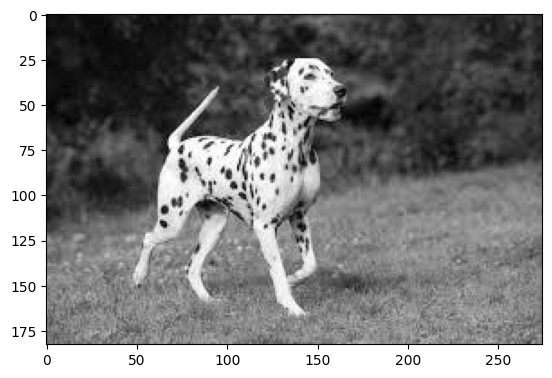

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/content/drive/MyDrive/Pet images'
Categories = ['Dogs', 'Cats']

for category in Categories:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
    plt.imshow(img_arr, cmap = 'gray')
    plt.show()
    break
  break

In [ ]:
print(img_arr)

[[ 12  14  16 ...  52  52  52]
 [ 12  14  17 ...  41  41  41]
 [ 13  14  17 ...  44  44  44]
 ...
 [ 91 127 123 ... 126 145 134]
 [ 86 109 124 ... 118 139 129]
 [126 111 133 ... 119 141 132]]


In [ ]:
print(img_arr.shape)

(183, 275)


Normalizing the images to same shape

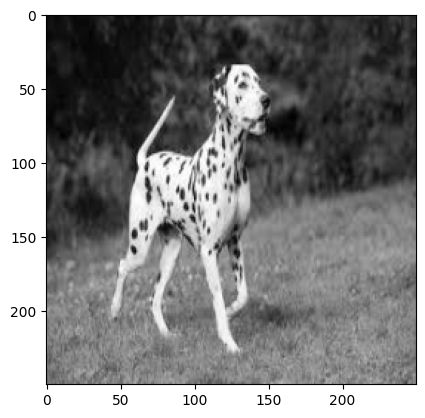

In [ ]:
IMG_SIZE = 250

new_array = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
  for category in Categories:
    path = os.path.join(DATADIR, category)
    class_num = Categories.index(category)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
        new_array = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()


In [ ]:
print(len(training_data))

697


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:15]:
  print(sample[1])

0
1
1
0
0
0
0
0
0
1
0
1
1
1
0


In [ ]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

To save this data, so that we don't need to keep calculating it every time

In [ ]:
import pickle

In [ ]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

In [ ]:
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

**Convolutional Neural Networks**

The Convolutional Neural Network gained popularity through its use with image data, and is currently the state of the art for detecting what an image is, or what is contained in the image.

The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output

Convolution is the act of taking the original data, and creating feature maps from it.Pooling is down-sampling, most often in the form of "max-pooling," where we select a region, and then take the maximum value in that region, and that becomes the new value for the entire region. Fully Connected Layers are typical neural networks, where all nodes are "fully connected." The convolutional layers are not fully connected like a traditional neural network.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
import pickle
X = pickle.load(open('/content/X.pickle', 'rb'))
y = pickle.load(open('/content/y.pickle', 'rb'))

Normalize the pixels

Min value = 0

Max value = 255

In [ ]:
X = X/255

In [ ]:
X = np.array(X)
y = np.array(y)

Building the Model

In [ ]:
model = Sequential()

# layer - 1 (Convolution layer )
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# layer - 2 (Convolution layer)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# layer - 3
model.add(Flatten()) # this layer converts 3d to 1D
model.add(Dense(64))
model.add(Activation('relu'))

# Output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compiling 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

# fit the data
model.fit(X, y, batch_size = 2, epochs = 5, validation_split = 0.1)     # batch_size --> optional

Epoch 1/5
314/314 [==============================] - 173s 549ms/step - loss: 0.9298 - accuracy: 0.4769 - val_loss: 0.6936 - val_accuracy: 0.4571
Epoch 2/5
314/314 [==============================] - 170s 542ms/step - loss: 0.7050 - accuracy: 0.5391 - val_loss: 0.6953 - val_accuracy: 0.4143
Epoch 3/5
314/314 [==============================] - 172s 546ms/step - loss: 0.6917 - accuracy: 0.5981 - val_loss: 0.6945 - val_accuracy: 0.5143
Epoch 4/5
314/314 [==============================] - 172s 547ms/step - loss: 0.5081 - accuracy: 0.7735 - val_loss: 1.0189 - val_accuracy: 0.5571
Epoch 5/5
314/314 [==============================] - 173s 550ms/step - loss: 0.1987 - accuracy: 0.9298 - val_loss: 1.2023 - val_accuracy: 0.6429


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "Cats-vs-dogs-CNN"

model = Sequential()

# layer - 1 (Convolution layer )
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# layer - 2 (Convolution layer)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# layer - 3
model.add(Flatten()) # this layer converts 3d to 1D
model.add(Dense(64))
model.add(Activation('relu'))

# Output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# Compiling 
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

# fit the data
model.fit(X, y, batch_size = 2, epochs = 3, validation_split = 0.1, callbacks = [tensorboard])

Epoch 1/3
314/314 [==============================] - 174s 552ms/step - loss: 0.7479 - accuracy: 0.4992 - val_loss: 0.6945 - val_accuracy: 0.4000
Epoch 2/3
314/314 [==============================] - 173s 550ms/step - loss: 0.6931 - accuracy: 0.5455 - val_loss: 0.6951 - val_accuracy: 0.4429
Epoch 3/3
314/314 [==============================] - 173s 551ms/step - loss: 0.6739 - accuracy: 0.6188 - val_loss: 0.7286 - val_accuracy: 0.5429


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs

**Optimizing with Tensorboard**

*Visualizing* the model with differentparameters like no. of layers, no. of nodes per layer, no. of dense layers to be added.

Key points to focus to get optimized model:

No. of layers

No. of nodes per layer

Having of dense layer t the end or not ?

Implementation

In [ ]:
import time

dense_layers = [0, 1]            # no. of dense layers
layer_sizes = [32, 64]         # no. of neurons in each layer
conv_layers = [1, 2]             # convolution layers 

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = '{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer, layer_size, dense_layer, int(time.time()))
      print(NAME)


1-conv-32-nodes-0-dense-1685168851
2-conv-32-nodes-0-dense-1685168851
1-conv-64-nodes-0-dense-1685168851
2-conv-64-nodes-0-dense-1685168851
1-conv-32-nodes-1-dense-1685168851
2-conv-32-nodes-1-dense-1685168851
1-conv-64-nodes-1-dense-1685168851
2-conv-64-nodes-1-dense-1685168851


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import time

dense_layers = [0, 1]            # no. of dense layers
layer_sizes = [32, 64]         # no. of neurons in each layer
conv_layers = [2, 3]             # convolution layers 

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = '{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer, layer_size, dense_layer, int(time.time()))
      tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
      print(NAME)
      model = Sequential()

      # layer - 1 (Convolution layer )
      model.add(Conv2D(layer_size, (3, 3), input_shape = X.shape[1:]))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size = (2, 2)))

      for l in range(conv_layer - 1):

        # layer - 2 (Convolution layer)
        model.add(Conv2D(layer_size, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2)))

      # layer - 3
      model.add(Flatten()) # this layer converts 3d to 1D

      for l in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation('relu'))

      # Output layer 
      model.add(Dense(1))
      model.add(Activation('sigmoid'))

      

      # Compiling 
      model.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam', 
                    metrics = ['accuracy'])

      # fit the data
      model.fit(X, y, batch_size = 2, epochs = 3, validation_split = 0.1, callbacks = [tensorboard])

2-conv-32-nodes-0-dense-1685168851
Epoch 1/3
314/314 [==============================] - 50s 157ms/step - loss: 0.7069 - accuracy: 0.5375 - val_loss: 0.7070 - val_accuracy: 0.4429
Epoch 2/3
314/314 [==============================] - 49s 157ms/step - loss: 0.6628 - accuracy: 0.6667 - val_loss: 0.8782 - val_accuracy: 0.4857
Epoch 3/3
314/314 [==============================] - 47s 149ms/step - loss: 0.5231 - accuracy: 0.7863 - val_loss: 0.7534 - val_accuracy: 0.5571
3-conv-32-nodes-0-dense-1685169054
Epoch 1/3
314/314 [==============================] - 57s 177ms/step - loss: 0.7081 - accuracy: 0.5295 - val_loss: 0.9425 - val_accuracy: 0.4000
Epoch 2/3
314/314 [==============================] - 55s 176ms/step - loss: 0.6950 - accuracy: 0.4944 - val_loss: 0.6897 - val_accuracy: 0.5714
Epoch 3/3
314/314 [==============================] - 52s 167ms/step - loss: 0.6879 - accuracy: 0.5678 - val_loss: 0.6835 - val_accuracy: 0.4857
2-conv-64-nodes-0-dense-1685169258
Epoch 1/3
314/314 [============

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import time

dense_layers = [1]            # no. of dense layers
layer_sizes = [32]         # no. of neurons in each layer
conv_layers = [2]             # convolution layers 

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = '{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer, layer_size, dense_layer, int(time.time()))
      tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
      print(NAME)
      model = Sequential()

      # layer - 1 (Convolution layer )
      model.add(Conv2D(layer_size, (3, 3), input_shape = X.shape[1:]))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size = (2, 2)))

      for l in range(conv_layer - 1):

        # layer - 2 (Convolution layer)
        model.add(Conv2D(layer_size, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2)))

      # layer - 3
      model.add(Flatten()) # this layer converts 3d to 1D

      for l in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation('relu'))

      # Output layer 
      model.add(Dense(1))
      model.add(Activation('sigmoid'))

      

      # Compiling 
      model.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam', 
                    metrics = ['accuracy'])

      # fit the data
      model.fit(X, y, batch_size = 2, epochs = 5, validation_split = 0.1, callbacks = [tensorboard])
model.save('32x2x1 CNN.model')

2-conv-32-nodes-1-dense-1685171296
Epoch 1/5
314/314 [==============================] - 60s 187ms/step - loss: 0.8904 - accuracy: 0.4992 - val_loss: 0.6945 - val_accuracy: 0.4000
Epoch 2/5
314/314 [==============================] - 58s 186ms/step - loss: 0.7134 - accuracy: 0.5279 - val_loss: 0.6956 - val_accuracy: 0.4429
Epoch 3/5
314/314 [==============================] - 63s 202ms/step - loss: 0.6645 - accuracy: 0.6874 - val_loss: 0.7404 - val_accuracy: 0.5143
Epoch 4/5
314/314 [==============================] - 59s 188ms/step - loss: 0.4028 - accuracy: 0.8341 - val_loss: 0.7940 - val_accuracy: 0.6000
Epoch 5/5
314/314 [==============================] - 59s 187ms/step - loss: 0.1593 - accuracy: 0.9537 - val_loss: 1.1408 - val_accuracy: 0.5714


**Predicting with the Model**

In [ ]:
import cv2
import tensorflow as tf

Categories = ['Dog', 'Cat']

def prepare(filepath):
  IMG_SIZE = 250
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
model = tf.keras.models.load_model('/content/32x2x1 CNN.model')

In [ ]:
prediction1 = model.predict([prepare('/content/Dog.jpg')])

1/1 [==============================] - 0s 90ms/step


In [ ]:
prediction1

array([[0.]], dtype=float32)

In [ ]:
prediction1[0][0]

0.0

In [ ]:
Categories[int(prediction1[0][0])]

'Dog'

In [ ]:
prediction2 = model.predict([prepare('/content/cat2.jpg')])
Categories[int(prediction2[0][0])]

1/1 [==============================] - 0s 38ms/step


'Cat'